# **РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ**

## ***Факультет физико-математических и естественных наук***

## **Отчет по лабораторной работе "Нелинейная регрессия"**

---



### **Студент** : Озьяс Стев Икнэль Дани   ------  **Группа** : НКНбд-01-21



Вариант 15.
1. фумкция одной переменной f(x) = (x^2 + 1)ln(x + 1) на отрезке [1, 2]
2. Порядок производной функции одной переменной З
3. функция ДВУХ переменных f(x, y) = ysin(x^3 + y^3) в области [О, 2] х [О, 2]
4. Порядок смешанной производной функции двух переменных d^4/ dx dy^3
5. Показатель качества регрессии: среднее квадратичное логарифмическое отклонение (MLSE)



In [1]:
import tensorflow_datasets as tfds
import pandas as pd
import tensorflow as tf
tf.keras.backend.set_floatx('float64')
import numpy as np
import math
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

## **Задание 1**

Построим тензор ранга 1 (вектор) со значениями функции **f(x) = (x^2 + 1)ln(x + 1)** на отрезке **[1, 2]**

In [2]:
def f(x):
  return (x**2 + 1)*tf.math.log(x + 1)

area = tf.constant(np.linspace(1, 2, 100), dtype=tf.float32)
farea = f(area)

farea, farea.dtype

(<tf.Tensor: shape=(100,), dtype=float32, numpy=
 array([1.3862944, 1.4105457, 1.4350942, 1.4599408, 1.4850881, 1.510538 ,
        1.5362922, 1.5623534, 1.588723 , 1.6154025, 1.6423948, 1.6697016,
        1.6973239, 1.7252643, 1.753525 , 1.7821068, 1.811013 , 1.8402433,
        1.8698013, 1.8996887, 1.9299058, 1.960456 , 1.9913403, 2.0225604,
        2.054118 , 2.086015 , 2.1182528, 2.1508334, 2.1837583, 2.217029 ,
        2.2506475, 2.2846155, 2.3189337, 2.3536055, 2.3886302, 2.4240108,
        2.4597492, 2.4958456, 2.5323029, 2.5691218, 2.6063042, 2.6438513,
        2.6817648, 2.7200463, 2.758697 , 2.797719 , 2.8371127, 2.8768804,
        2.9170237, 2.9575431, 2.9984415, 3.0397182, 3.0813768, 3.1234171,
        3.165841 , 3.2086504, 3.2518463, 3.2954297, 3.3394027, 3.3837657,
        3.428521 , 3.473669 , 3.5192122, 3.5651507, 3.6114872, 3.658221 ,
        3.7053547, 3.7528903, 3.8008273, 3.8491685, 3.8979142, 3.9470656,
        3.996625 , 4.0465927, 4.09697  , 4.1477585, 4.1989594, 

Определим максимальное и минимальное значения функции

In [3]:
max_value = tf.reduce_max(farea)
min_value = tf.reduce_min(farea)
print("Максимальное значение функции: ", max_value.numpy())
print("\nМинимальное значение функции: ", min_value.numpy())

Максимальное значение функции:  5.4930615

Минимальное значение функции:  1.3862944


## **Задача 2**

Построим график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

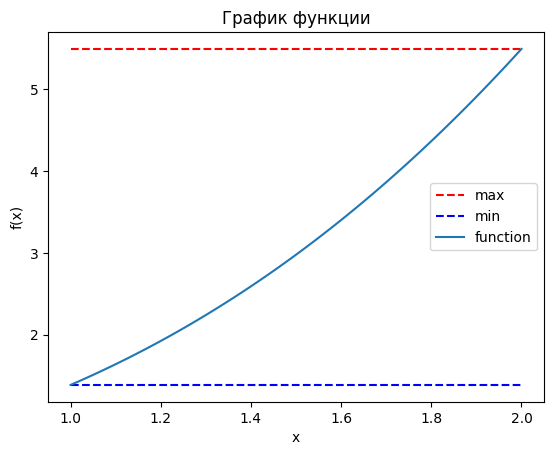

In [4]:
# Прямые, соответствующие максимальному и минимальному значению функции
plt.plot(area, [max_value] * len(area), 'r--', label='max')
plt.plot(area, [min_value] * len(area), 'b--', label='min')

plt.plot(area, farea, label='function')

# Подписываем оси, заголовок и легенду
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции')
plt.legend()
plt.show()

## **Задание 3**

Найдем значения производной от функции **порядка 3**

In [5]:
x = tf.Variable(area)

def der3(x):
  with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
      with tf.GradientTape() as gt3:
        y = f(x)
      dydx = gt3.gradient(y, x)
    d2ydx2 = gt2.gradient(dydx, x)
  d3ydx3 = gt1.gradient(d2ydx2, x)

  return d3ydx3


deriv3 = der3(x)

deriv3

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([2.       , 1.9824626, 1.9651992, 1.9482051, 1.9314733, 1.914999 ,
       1.8987763, 1.8827999, 1.8670647, 1.8515656, 1.836298 , 1.8212566,
       1.8064374, 1.7918352, 1.7774458, 1.7632651, 1.7492887, 1.7355127,
       1.7219331, 1.7085452, 1.6953466, 1.6823325, 1.6695001, 1.6568451,
       1.6443646, 1.632055 , 1.6199132, 1.6079359, 1.5961201, 1.5844628,
       1.5729609, 1.561611 , 1.5504116, 1.5393584, 1.52845  , 1.5176831,
       1.507055 , 1.4965637, 1.4862063, 1.4759806, 1.4658842, 1.4559149,
       1.4460704, 1.4363483, 1.4267468, 1.4172637, 1.4078969, 1.3986442,
       1.3895038, 1.3804741, 1.3715527, 1.3627383, 1.3540285, 1.345422 ,
       1.3369169, 1.3285115, 1.3202043, 1.3119935, 1.3038776, 1.295855 ,
       1.2879244, 1.280084 , 1.2723325, 1.2646685, 1.2570906, 1.2495973,
       1.2421875, 1.2348597, 1.2276126, 1.2204452, 1.213356 , 1.2063438,
       1.1994073, 1.1925458, 1.1857576, 1.1790421, 1.172398 , 1.1658239,
   

Построим график полученной функции, подписывая оси и рисунок

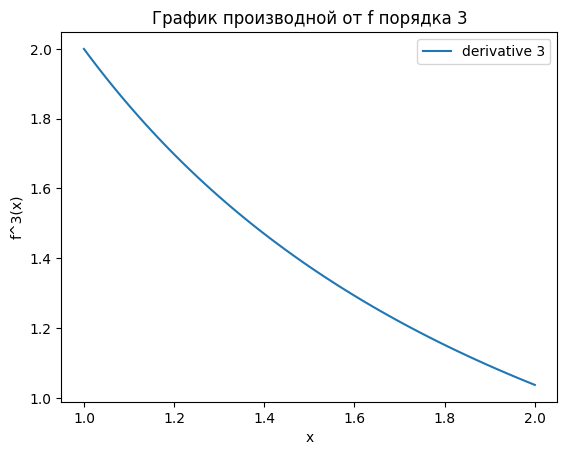

In [6]:
plt.plot(area, deriv3, label='derivative 3')

# Подписываем оси, заголовок и легенду
plt.xlabel('x')
plt.ylabel('f^3(x)')
plt.title('График производной от f порядка 3')
plt.legend()
plt.show()

## **Задание 4**

Построим тензор ранга 2 (матрицу) со значениями функции **f(x, y) = ysin(x^3 + y^3)** в области **[О, 2] х [О, 2]**

In [7]:
def f(x, y):
  return y*tf.math.sin(x**3 + y**3)

area1 = tf.constant(np.linspace(0, 2, 50))
area2 = tf.constant(np.linspace(0, 2, 50))

X, Y = tf.meshgrid(area1, area2)

Z = f(X, Y)

Z

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.77546441e-06,  5.55092880e-06,  2.49791781e-05, ...,
         2.86102499e-02,  3.85636793e-02,  4.03815653e-02],
       [ 4.44074284e-05,  4.99583562e-05,  8.88148436e-05, ...,
         5.72482061e-02,  7.71400799e-02,  8.07574653e-02],
       ...,
       [ 1.34458870e+00,  1.34468174e+00,  1.34533284e+00, ...,
         1.91807455e+00,  1.73334108e+00,  1.15809020e+00],
       [ 1.85101296e+00,  1.85105661e+00,  1.85136192e+00, ...,
         1.77022068e+00,  1.21308952e+00,  3.65836073e-01],
       [ 1.97871649e+00,  1.97869670e+00,  1.97855790e+00, ...,
         1.20737063e+00,  3.73457658e-01, -5.75806633e-01]])>

Определим максимальное и минимальное значения функции

In [8]:
max_value = tf.reduce_max(Z)
min_value = tf.reduce_min(Z)
print("Максимальное значение функции: ", max_value.numpy())
print("\nМинимальное значение функции: ", min_value.numpy())

Максимальное значение функции:  1.9964927357203972

Минимальное значение функции:  -1.9935838357516218


## **Задача 5**

Построим 3d график поверхности функции двух переменных, подписывая оси и рисунок.

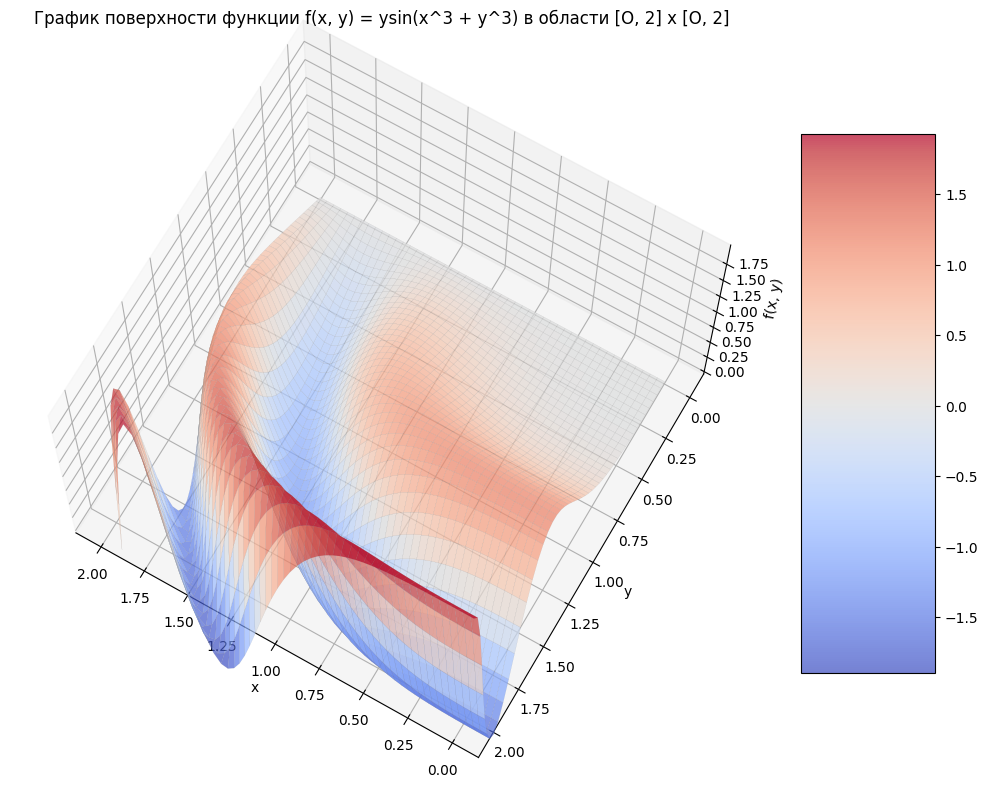

In [9]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.05, cmap=cm.coolwarm, alpha=0.7, antialiased=True, \
                       edgecolors='gray')

ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('f(x, y)', fontsize=10)
ax.set_title("График поверхности функции f(x, y) = ysin(x^3 + y^3) в области [О, 2] х [О, 2]", fontsize=12)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.7, aspect=4)

ax.set_zlim(0., tf.reduce_max(Z))
ax.view_init(elev = 70, azim = 120)

## **Задача 6**

Найдем значения смешанной производной от функции порядка

In [10]:
def mixder3(x, y):
  with tf.GradientTape() as gt1:
    gt1.watch(y)
    with tf.GradientTape() as gt2:
      gt2.watch(y)
      with tf.GradientTape() as gt3:
        gt3.watch(y)
        with tf.GradientTape() as gt4:
          gt4.watch(x)
          g = f(x, y)
        dy_dx = gt4.gradient(g, x)
      d2y_dxdy = gt3.gradient(dy_dx, y)
    d3y_dxdy2 = gt2.gradient(d2y_dxdy, y)
  d4y_dxdy3 = gt1.gradient(d3y_dxdy2, y)

  return d4y_dxdy3


Z2 = mixder3(X, Y)

Z2

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.78942893e-06, -1.64793905e-05, ...,
        -7.58261651e+00, -1.06584934e+01, -1.16294980e+01],
       [ 0.00000000e+00, -2.39700192e-05, -1.14523388e-04, ...,
        -1.51973389e+01, -2.13323508e+01, -2.32518387e+01],
       ...,
       [ 0.00000000e+00,  4.97238317e+00,  1.99140559e+01, ...,
         2.77775327e+04,  3.17939455e+04,  2.88628110e+04],
       [ 0.00000000e+00,  1.19500217e+01,  4.78199905e+01, ...,
         3.50183872e+04,  3.17852281e+04,  2.06667490e+04],
       [ 0.00000000e+00,  1.77943577e+01,  7.11849033e+01, ...,
         3.41210201e+04,  2.19891666e+04,  3.11942620e+03]])>

Построим 3d график поверхности полученной функции, подписывая оси и рисунок.

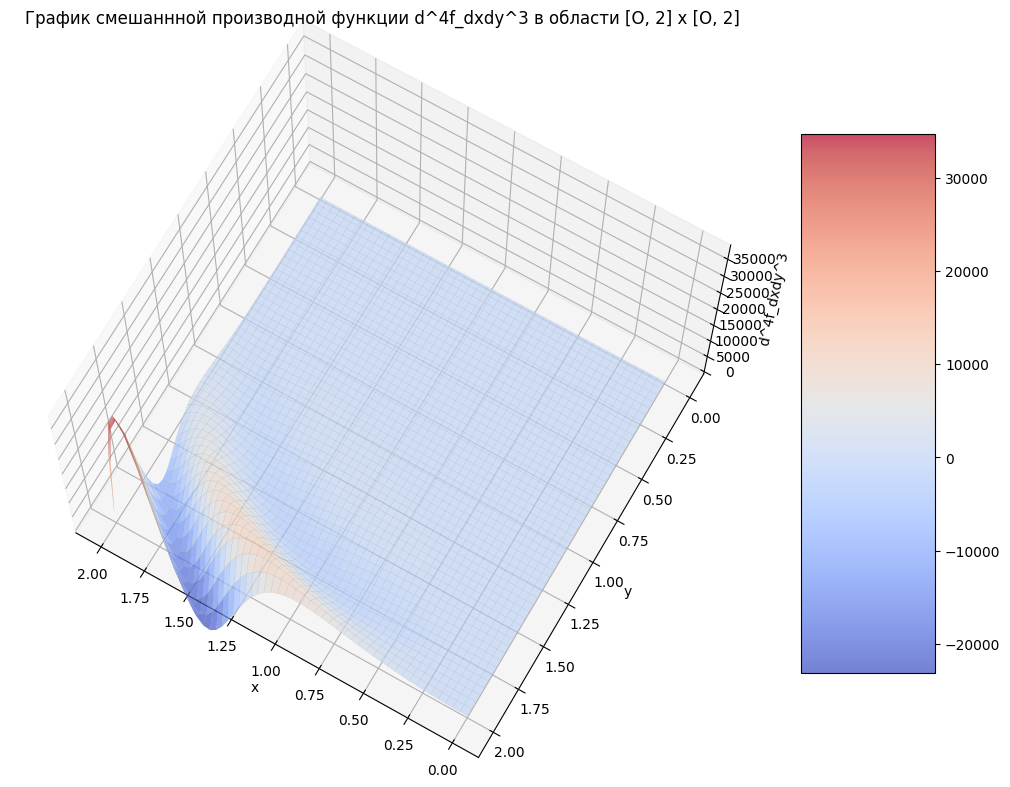

In [11]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, linewidth=0.05, cmap=cm.coolwarm, alpha=0.7, antialiased=True, \
                       edgecolors='gray')

ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('d^4f_dxdy^3', fontsize=10)
ax.set_title("График смешаннной производной функции d^4f_dxdy^3 в области [О, 2] х [О, 2]", fontsize=12)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.7, aspect=4)

ax.set_zlim(0., tf.reduce_max(Z2))
ax.view_init(elev = 70, azim = 120)

## **Задача 7**

Решим задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал [0,1]. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.


In [12]:
class Model(object):
  def __init__(self):
    # Инициализируем вес как `2.0` и смещение как  `1.0`
    # На практике инициализация должна быть случайными значениями (`tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(3.0)

  def __call__(self, x : tf.float32):
    return self.w * x + self.b

model = Model()

Определяем функцию потерь по показателю MSLE

$$Loss = \frac{1}{n} \sum_{i} \left(\ln(1 + y_{target}^i) - \ln(1 + y_{pred}^i) \right )^2$$

In [13]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(tf.math.log(1 + target_y) - tf.math.log(1 + predicted_y)))

Масштабируем независимую и зависимую переменные на интервал [0,1].

In [14]:
TRUE_w = 1.0
TRUE_b = 2.0

x = area
y = farea

xs = (x - np.min(x))/(np.max(x) - np.min(x))
ys = (y - np.min(y))/(np.max(y) - np.min(y))

xs = tf.convert_to_tensor(xs, tf.float32)
ys = tf.convert_to_tensor(ys, tf.float32)


Функция для обучения модели

In [15]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

Теперь будем в цикле обновлять веса и смещения при помощи обучающих данных и смотреть, как эволюционируют `w` и `b`.

In [16]:
model = Model()

# Запоминаем историю значений 'w' и 'b' для визуализации
list_w, list_b = [], []
epochs = range(300)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.15)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=2.00 b=3.00, потери=1.61701
Эпоха  1: w=1.97 b=2.92, потери=1.56853
Эпоха  2: w=1.93 b=2.84, потери=1.51968
Эпоха  3: w=1.90 b=2.77, потери=1.47045
Эпоха  4: w=1.86 b=2.69, потери=1.42087
Эпоха  5: w=1.83 b=2.61, потери=1.37094
Эпоха  6: w=1.79 b=2.53, потери=1.32070
Эпоха  7: w=1.75 b=2.45, потери=1.27017
Эпоха  8: w=1.72 b=2.37, потери=1.21937
Эпоха  9: w=1.68 b=2.29, потери=1.16834
Эпоха 10: w=1.65 b=2.21, потери=1.11713
Эпоха 11: w=1.61 b=2.13, потери=1.06577
Эпоха 12: w=1.58 b=2.05, потери=1.01431
Эпоха 13: w=1.54 b=1.97, потери=0.96283
Эпоха 14: w=1.51 b=1.89, потери=0.91139
Эпоха 15: w=1.47 b=1.81, потери=0.86006
Эпоха 16: w=1.44 b=1.73, потери=0.80893
Эпоха 17: w=1.40 b=1.65, потери=0.75810
Эпоха 18: w=1.37 b=1.57, потери=0.70769
Эпоха 19: w=1.33 b=1.49, потери=0.65782
Эпоха 20: w=1.30 b=1.41, потери=0.60862
Эпоха 21: w=1.26 b=1.33, потери=0.56026
Эпоха 22: w=1.23 b=1.25, потери=0.51288
Эпоха 23: w=1.20 b=1.18, потери=0.46668
Эпоха 24: w=1.16 b=1.10, потери=0.42185


In [17]:
print('Текущие потери (ошибка): %1.6f' % loss(model(xs), ys).numpy())

Текущие потери (ошибка): 0.000596


## **Задача 8**

Построим кривую обучения для показателя качества регрессии **MSLE** с зависимостью от количества эпох

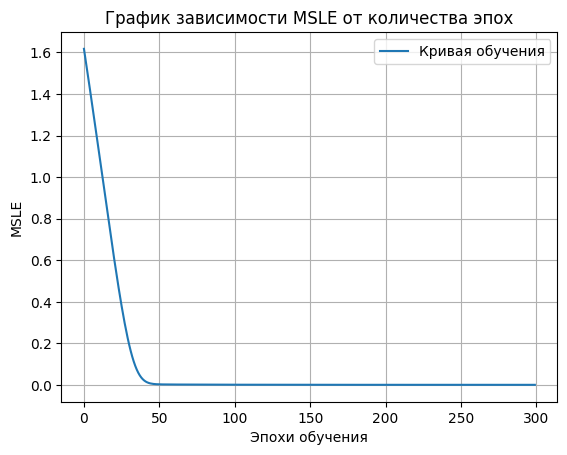

In [18]:
plt.plot(epochs, losses)
plt.title('График зависимости MSLE от количества эпох')
plt.xlabel('Эпохи обучения')
plt.ylabel('MSLE')
plt.legend(['Кривая обучения'], loc='upper right')
plt.grid(True)

##  **Задача 9**

Изобразим на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

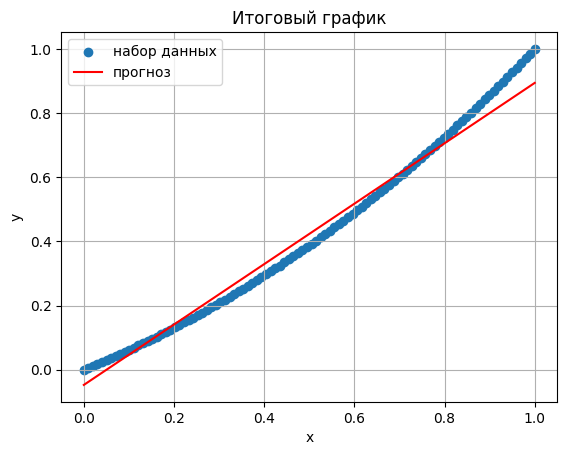

In [19]:
y_pred = model(xs)

plt.scatter(xs, ys, label='набор данных')
plt.plot(xs, y_pred, color='r', label='прогноз')
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Итоговый график")
plt.grid();